# Modelling using Support Vector Machines

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
tc_data = pd.read_csv("/home2/MyNotes/Python/DataSets/CustomerChurn/telecomChurn.csv",b
                             sep=",",
                             header=0)
tc_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupportYes,StreamingTVNo internet service,StreamingTVYes,StreamingMoviesNo internet service,StreamingMoviesYes,ContractOne year,ContractTwo year,PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,0,0,1,1,45,1,1,81.00,3533.60,No,...,1,0,1,0,1,0,1,0,0,1
1,1,0,0,0,4,1,1,81.00,340.85,Yes,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,1,18,1,1,20.25,401.95,No,...,0,1,0,1,0,0,0,0,0,1
3,0,0,1,0,53,1,1,93.45,4872.20,No,...,1,0,1,0,1,1,0,0,1,0
4,0,1,1,0,3,1,1,74.60,239.05,No,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Looks like these are new customers as the tenure is zero. We can update the MonthlyCharges into TotalCharges
tc_data["TotalCharges"] = tc_data["TotalCharges"].fillna(value=tc_data["MonthlyCharges"])

In [3]:
tc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 31 columns):
gender                                  4930 non-null int64
SeniorCitizen                           4930 non-null int64
Partner                                 4930 non-null int64
Dependents                              4930 non-null int64
tenure                                  4930 non-null int64
PhoneService                            4930 non-null int64
PaperlessBilling                        4930 non-null int64
MonthlyCharges                          4930 non-null float64
TotalCharges                            4930 non-null float64
Churn                                   4930 non-null object
MultipleLinesNo phone service           4930 non-null int64
MultipleLinesYes                        4930 non-null int64
InternetServiceFiber optic              4930 non-null int64
InternetServiceNo                       4930 non-null int64
OnlineSecurityNo internet service       4930 non

In [4]:
tc_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupportYes,StreamingTVNo internet service,StreamingTVYes,StreamingMoviesNo internet service,StreamingMoviesYes,ContractOne year,ContractTwo year,PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,0,0,1,1,45,1,1,81.00,3533.60,No,...,1,0,1,0,1,0,1,0,0,1
1,1,0,0,0,4,1,1,81.00,340.85,Yes,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,1,18,1,1,20.25,401.95,No,...,0,1,0,1,0,0,0,0,0,1
3,0,0,1,0,53,1,1,93.45,4872.20,No,...,1,0,1,0,1,1,0,0,1,0
4,0,1,1,0,3,1,1,74.60,239.05,No,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Because Support vector machine algorithm is sensitive to magnitude due to calculation of distances, 
# we should scale the attributes which have different scale

from sklearn import preprocessing
scaled = pd.DataFrame(preprocessing.scale(tc_data[["TotalCharges","tenure","MonthlyCharges"]]),columns=["ScaledTC","ScaledTenure","ScaledMonChar"])

In [33]:
tc_data = tc_data.join(scaled).drop(["TotalCharges","tenure","MonthlyCharges"],axis=1)

In [34]:
tc_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLinesNo phone service,MultipleLinesYes,InternetServiceFiber optic,...,StreamingMoviesNo internet service,StreamingMoviesYes,ContractOne year,ContractTwo year,PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check,ScaledTC,ScaledTenure,ScaledMonChar
0,0,0,1,1,1,1,No,0,0,0,...,0,1,0,1,0,0,1,0.539749,0.498947,0.535693
1,1,0,0,0,1,1,Yes,0,0,1,...,0,0,0,0,0,1,0,-0.865600,-1.168417,0.535693
2,0,0,1,1,1,1,No,0,0,0,...,1,0,0,0,0,0,1,-0.838706,-0.599073,-1.485010


In [35]:
# Treating categorical variables
Churn_f = pd.get_dummies(tc_data["Churn"],drop_first=True,prefix="Churn")
tc_data_clean = pd.concat([tc_data,Churn_f],axis=1)

In [36]:
tc_data_clean.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLinesNo phone service,MultipleLinesYes,InternetServiceFiber optic,...,StreamingMoviesYes,ContractOne year,ContractTwo year,PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check,ScaledTC,ScaledTenure,ScaledMonChar,Churn_Yes
0,0,0,1,1,1,1,No,0,0,0,...,1,0,1,0,0,1,0.539749,0.498947,0.535693,0
1,1,0,0,0,1,1,Yes,0,0,1,...,0,0,0,0,1,0,-0.865600,-1.168417,0.535693,1
2,0,0,1,1,1,1,No,0,0,0,...,0,0,0,0,0,1,-0.838706,-0.599073,-1.485010,0
3,0,0,1,0,1,1,No,0,0,1,...,1,1,0,0,1,0,1.128959,0.824286,0.949812,0
4,0,1,1,0,1,1,No,0,0,1,...,0,0,0,0,0,0,-0.910409,-1.209084,0.322812,0


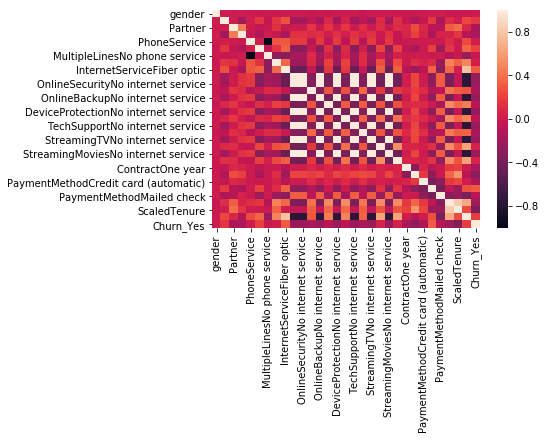

In [57]:
import seaborn as sns
sns.heatmap(tc_data_clean.corr())

In [37]:
tc_data_features = tc_data_clean.drop("Churn",axis=1)
tc_data_target = tc_data_clean["Churn_Yes"]

In [38]:
print("Sizes:{} {}".format(tc_data_features["gender"].count(),tc_data_target.size))
print("Types:{} {}".format(type(tc_data_features),type(tc_data_target)))

Sizes:4930 4930
Types:<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tc_data_features,tc_data_target, test_size=0.30, random_state=101)

In [40]:
print("Sizes:{} {}".format(X_train["gender"].count(),y_train.size))
print("Sizes:{} {}".format(X_test["gender"].count(),y_test.size))
print("Types:{} {}".format(type(X_train),type(y_train)))

Sizes:3451 3451
Sizes:1479 1479
Types:<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [43]:
from sklearn.svm import SVC
SVMmodel = SVC()
SVMmodel.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
predictions = SVMmodel.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1096
          1       1.00      1.00      1.00       383

avg / total       1.00      1.00      1.00      1479

[[1096    0]
 [   0  383]]


In [49]:
# Using grid search
# We can have various values of C, max_iter,tol, solver
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10, 100, 1000], 'max_iter': [50,100,150], 'tol':[0.001,0.0001,0.01]} 

In [50]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [51]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] C=0.1, max_iter=50, tol=0.001 ...................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning

[CV] ......... C=0.1, max_iter=50, tol=0.001, score=1.0, total=   0.3s
[CV] C=0.1, max_iter=50, tol=0.001 ...................................
[CV] ......... C=0.1, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=50, tol=0.001 ...................................
[CV] ......... C=0.1, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=50, tol=0.0001 ..................................
[CV] ........ C=0.1, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=50, tol=0.0001 ..................................
[CV] ........ C=0.1, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=50, tol=0.0001 ..................................
[CV] ........ C=0.1, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=50, tol=0.01 ....................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/

[CV] .......... C=0.1, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=50, tol=0.01 ....................................
[CV] .......... C=0.1, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=50, tol=0.01 ....................................
[CV] .......... C=0.1, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=100, tol=0.001 ..................................
[CV] ........ C=0.1, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=100, tol=0.001 ..................................
[CV] ........ C=0.1, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=100, tol=0.001 ..................................
[CV] ........ C=0.1, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=100, tol=0.0001 .................................
[CV] ....... C=0.1, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=100, tol=0.0001 .................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....... C=0.1, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=100, tol=0.0001 .................................
[CV] ....... C=0.1, max_iter=100, tol=0.0001, score=1.0, total=   0.1s
[CV] C=0.1, max_iter=100, tol=0.01 ...................................
[CV] ......... C=0.1, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=100, tol=0.01 ...................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......... C=0.1, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=0.1, max_iter=100, tol=0.01 ...................................
[CV] ......... C=0.1, max_iter=100, tol=0.01, score=1.0, total=   0.1s
[CV] C=0.1, max_iter=150, tol=0.001 ..................................
[CV] ........ C=0.1, max_iter=150, tol=0.001, score=1.0, total=   0.1s
[CV] C=0.1, max_iter=150, tol=0.001 ..................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........ C=0.1, max_iter=150, tol=0.001, score=1.0, total=   0.1s
[CV] C=0.1, max_iter=150, tol=0.001 ..................................
[CV] ........ C=0.1, max_iter=150, tol=0.001, score=1.0, total=   0.1s
[CV] C=0.1, max_iter=150, tol=0.0001 .................................
[CV] ....... C=0.1, max_iter=150, tol=0.0001, score=1.0, total=   0.1s
[CV] C=0.1, max_iter=150, tol=0.0001 .................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....... C=0.1, max_iter=150, tol=0.0001, score=1.0, total=   0.1s
[CV] C=0.1, max_iter=150, tol=0.0001 .................................
[CV] ....... C=0.1, max_iter=150, tol=0.0001, score=1.0, total=   0.1s
[CV] C=0.1, max_iter=150, tol=0.01 ...................................
[CV] ......... C=0.1, max_iter=150, tol=0.01, score=1.0, total=   0.1s
[CV] C=0.1, max_iter=150, tol=0.01 ...................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......... C=0.1, max_iter=150, tol=0.01, score=1.0, total=   0.1s
[CV] C=0.1, max_iter=150, tol=0.01 ...................................
[CV] ......... C=0.1, max_iter=150, tol=0.01, score=1.0, total=   0.1s
[CV] C=1, max_iter=50, tol=0.001 .....................................
[CV] ........... C=1, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=1, max_iter=50, tol=0.001 .....................................
[CV] ........... C=1, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=1, max_iter=50, tol=0.001 .....................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/

[CV] ........... C=1, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=1, max_iter=50, tol=0.0001 ....................................
[CV] .......... C=1, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1, max_iter=50, tol=0.0001 ....................................
[CV] .......... C=1, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1, max_iter=50, tol=0.0001 ....................................
[CV] .......... C=1, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1, max_iter=50, tol=0.01 ......................................
[CV] ............ C=1, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=1, max_iter=50, tol=0.01 ......................................
[CV] ............ C=1, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=1, max_iter=50, tol=0.01 ......................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/B

[CV] ............ C=1, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=1, max_iter=100, tol=0.001 ....................................
[CV] .......... C=1, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=1, max_iter=100, tol=0.001 ....................................
[CV] .......... C=1, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=1, max_iter=100, tol=0.001 ....................................
[CV] .......... C=1, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=1, max_iter=100, tol=0.0001 ...................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......... C=1, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1, max_iter=100, tol=0.0001 ...................................
[CV] ......... C=1, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1, max_iter=100, tol=0.0001 ...................................
[CV] ......... C=1, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1, max_iter=100, tol=0.01 .....................................
[CV] ........... C=1, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=1, max_iter=100, tol=0.01 .....................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........... C=1, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=1, max_iter=100, tol=0.01 .....................................
[CV] ........... C=1, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=1, max_iter=150, tol=0.001 ....................................
[CV] .......... C=1, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=1, max_iter=150, tol=0.001 ....................................
[CV] .......... C=1, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=1, max_iter=150, tol=0.001 ....................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .......... C=1, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=1, max_iter=150, tol=0.0001 ...................................
[CV] ......... C=1, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1, max_iter=150, tol=0.0001 ...................................
[CV] ......... C=1, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1, max_iter=150, tol=0.0001 ...................................
[CV] ......... C=1, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1, max_iter=150, tol=0.01 .....................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........... C=1, max_iter=150, tol=0.01, score=1.0, total=   0.0s
[CV] C=1, max_iter=150, tol=0.01 .....................................
[CV] ........... C=1, max_iter=150, tol=0.01, score=1.0, total=   0.0s
[CV] C=1, max_iter=150, tol=0.01 .....................................
[CV] ........... C=1, max_iter=150, tol=0.01, score=1.0, total=   0.0s
[CV] C=10, max_iter=50, tol=0.001 ....................................
[CV] .......... C=10, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=10, max_iter=50, tol=0.001 ....................................
[CV] .......... C=10, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=10, max_iter=50, tol=0.001 ....................................
[CV] .......... C=10, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=10, max_iter=50, tol=0.0001 ...................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/

[CV] ......... C=10, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=10, max_iter=50, tol=0.0001 ...................................
[CV] ......... C=10, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=10, max_iter=50, tol=0.0001 ...................................
[CV] ......... C=10, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=10, max_iter=50, tol=0.01 .....................................
[CV] ........... C=10, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=10, max_iter=50, tol=0.01 .....................................
[CV] ........... C=10, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=10, max_iter=50, tol=0.01 .....................................
[CV] ........... C=10, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=10, max_iter=100, tol=0.001 ...................................
[CV] ......... C=10, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=10, max_iter=100, tol=0.001 ...................................
[CV] .

/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2

[CV] ......... C=10, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=10, max_iter=100, tol=0.0001 ..................................
[CV] ........ C=10, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=10, max_iter=100, tol=0.0001 ..................................
[CV] ........ C=10, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=10, max_iter=100, tol=0.0001 ..................................
[CV] ........ C=10, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=10, max_iter=100, tol=0.01 ....................................
[CV] .......... C=10, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=10, max_iter=100, tol=0.01 ....................................
[CV] .......... C=10, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=10, max_iter=100, tol=0.01 ....................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/hom

[CV] .......... C=10, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=10, max_iter=150, tol=0.001 ...................................
[CV] ......... C=10, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=10, max_iter=150, tol=0.001 ...................................
[CV] ......... C=10, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=10, max_iter=150, tol=0.001 ...................................
[CV] ......... C=10, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=10, max_iter=150, tol=0.0001 ..................................
[CV] ........ C=10, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=10, max_iter=150, tol=0.0001 ..................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/hom

[CV] ........ C=10, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=10, max_iter=150, tol=0.0001 ..................................
[CV] ........ C=10, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=10, max_iter=150, tol=0.01 ....................................
[CV] .......... C=10, max_iter=150, tol=0.01, score=1.0, total=   0.0s
[CV] C=10, max_iter=150, tol=0.01 ....................................
[CV] .......... C=10, max_iter=150, tol=0.01, score=1.0, total=   0.0s
[CV] C=10, max_iter=150, tol=0.01 ....................................
[CV] .......... C=10, max_iter=150, tol=0.01, score=1.0, total=   0.0s
[CV] C=100, max_iter=50, tol=0.001 ...................................
[CV] ......... C=100, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=100, max_iter=50, tol=0.001 ...................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2

[CV] ......... C=100, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=100, max_iter=50, tol=0.001 ...................................
[CV] ......... C=100, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=100, max_iter=50, tol=0.0001 ..................................
[CV] ........ C=100, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=100, max_iter=50, tol=0.0001 ..................................
[CV] ........ C=100, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=100, max_iter=50, tol=0.0001 ..................................
[CV] ........ C=100, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=100, max_iter=50, tol=0.01 ....................................
[CV] .......... C=100, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=100, max_iter=50, tol=0.01 ....................................
[CV] .......... C=100, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=100, max_iter=50, tol=0.01 ....................................
[CV] .

/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/

[CV] ........ C=100, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=100, max_iter=100, tol=0.001 ..................................
[CV] ........ C=100, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=100, max_iter=100, tol=0.001 ..................................
[CV] ........ C=100, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=100, max_iter=100, tol=0.0001 .................................
[CV] ....... C=100, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=100, max_iter=100, tol=0.0001 .................................
[CV] ....... C=100, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=100, max_iter=100, tol=0.0001 .................................
[CV] ....... C=100, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=100, max_iter=100, tol=0.01 ...................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/hom

[CV] ......... C=100, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=100, max_iter=100, tol=0.01 ...................................
[CV] ......... C=100, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=100, max_iter=100, tol=0.01 ...................................
[CV] ......... C=100, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=100, max_iter=150, tol=0.001 ..................................
[CV] ........ C=100, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=100, max_iter=150, tol=0.001 ..................................
[CV] ........ C=100, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=100, max_iter=150, tol=0.001 ..................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/hom

[CV] ........ C=100, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=100, max_iter=150, tol=0.0001 .................................
[CV] ....... C=100, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=100, max_iter=150, tol=0.0001 .................................
[CV] ....... C=100, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=100, max_iter=150, tol=0.0001 .................................
[CV] ....... C=100, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=100, max_iter=150, tol=0.01 ...................................
[CV] ......... C=100, max_iter=150, tol=0.01, score=1.0, total=   0.0s
[CV] C=100, max_iter=150, tol=0.01 ...................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home

[CV] ......... C=100, max_iter=150, tol=0.01, score=1.0, total=   0.0s
[CV] C=100, max_iter=150, tol=0.01 ...................................
[CV] ......... C=100, max_iter=150, tol=0.01, score=1.0, total=   0.0s
[CV] C=1000, max_iter=50, tol=0.001 ..................................
[CV] ........ C=1000, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=50, tol=0.001 ..................................
[CV] ........ C=1000, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=50, tol=0.001 ..................................
[CV] ........ C=1000, max_iter=50, tol=0.001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=50, tol=0.0001 .................................
[CV] ....... C=1000, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=50, tol=0.0001 .................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/B

[CV] ....... C=1000, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=50, tol=0.0001 .................................
[CV] ....... C=1000, max_iter=50, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=50, tol=0.01 ...................................
[CV] ......... C=1000, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=1000, max_iter=50, tol=0.01 ...................................
[CV] ......... C=1000, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=1000, max_iter=50, tol=0.01 ...................................
[CV] ......... C=1000, max_iter=50, tol=0.01, score=1.0, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.001 .................................
[CV] ....... C=1000, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.001 .................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/hom

[CV] ....... C=1000, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.001 .................................
[CV] ....... C=1000, max_iter=100, tol=0.001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.0001 ................................
[CV] ...... C=1000, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.0001 ................................
[CV] ...... C=1000, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.0001 ................................
[CV] ...... C=1000, max_iter=100, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.01 ..................................
[CV] ........ C=1000, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.01 ..................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/hom

[CV] ........ C=1000, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=1000, max_iter=100, tol=0.01 ..................................
[CV] ........ C=1000, max_iter=100, tol=0.01, score=1.0, total=   0.0s
[CV] C=1000, max_iter=150, tol=0.001 .................................
[CV] ....... C=1000, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=150, tol=0.001 .................................
[CV] ....... C=1000, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=150, tol=0.001 .................................
[CV] ....... C=1000, max_iter=150, tol=0.001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=150, tol=0.0001 ................................


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/hom

[CV] ...... C=1000, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=150, tol=0.0001 ................................
[CV] ...... C=1000, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=150, tol=0.0001 ................................
[CV] ...... C=1000, max_iter=150, tol=0.0001, score=1.0, total=   0.0s
[CV] C=1000, max_iter=150, tol=0.01 ..................................
[CV] ........ C=1000, max_iter=150, tol=0.01, score=1.0, total=   0.0s
[CV] C=1000, max_iter=150, tol=0.01 ..................................
[CV] ........ C=1000, max_iter=150, tol=0.01, score=1.0, total=   0.0s
[CV] C=1000, max_iter=150, tol=0.01 ..................................
[CV] ........ C=1000, max_iter=150, tol=0.01, score=1.0, total=   0.0s


/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    6.6s finished
/home2/BigData/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'max_iter': [50, 100, 150], 'tol': [0.001, 0.0001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [52]:
grid.best_params_

{'C': 0.1, 'max_iter': 50, 'tol': 0.001}

In [53]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=50, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
predictions = grid.predict(X_test)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1096
          1       1.00      1.00      1.00       383

avg / total       1.00      1.00      1.00      1479

[[1096    0]
 [   0  383]]
